In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.learner import *
from fastai.column_data import *

/home/kaju/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kaju/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kaju/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
path='data/books/'

In [5]:
book_ratings = pd.read_csv(path+'ratings.csv')

In [6]:
book_ratings[0:10]

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
5,1,2077,4
6,1,2487,4
7,1,2900,5
8,1,3662,4
9,1,3922,5


In [7]:
books = pd.read_csv(path+'books.csv')

In [8]:
books[0:10]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


In [9]:
unq_cnt_users = book_ratings.groupby('user_id')['rating'].count()
top_unq_cnt_users = unq_cnt_users.sort_values(ascending=False)[:15]

In [10]:
unq_cnt_books = book_ratings.groupby('book_id')['rating'].count()
top_unq_cnt_books = unq_cnt_books.sort_values(ascending=False)[:15]

In [11]:
top_row = book_ratings.join(top_unq_cnt_users, rsuffix='R', how='inner', on='user_id')
top_row = top_row.join(top_unq_cnt_books, rsuffix='R', how='inner', on='book_id')

In [12]:
top_row

,book_id,user_id,rating,ratingR,ratingR
330218,3306,15604,4,196,100
330200,3306,9806,4,196,100


In [13]:
pd.crosstab(top_row.user_id, top_row.book_id, top_row.rating, aggfunc=np.sum)

book_id,3306
user_id,
9806,4
15604,4


In [14]:
val_idx=get_cv_idxs(len(book_ratings))
wd=2e-4 #weight decay variable
n_factors=50

In [15]:
val_idx[:10]

array([646451, 614851, 974393,  21471, 272540, 235240, 874406, 414606, 283254, 432283])

In [16]:
cf=CollabFilterDataset.from_csv(path,'ratings.csv','user_id','book_id','rating')
learn=cf.get_learner(n_factors, val_idx, 64, opt_fn=optim.Adam)

In [17]:
learn.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                                    
    0      1.002653   0.996301  
    1      1.019555   1.004532                                    
    2      0.9928     0.996863                                    



[array([0.99686])]

In [35]:
cf1=CollabFilterDataset.from_csv(path,'ratings.csv','user_id','book_id','rating')
AdamW = partial(optim.Adam, betas=(0.9,0.99))
learn=cf1.get_learner(n_factors, val_idx, 64, opt_fn=AdamW)

In [36]:
learn.fit(1e-2, 3, wds=wd, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                                   
    0      1.296525   1.31091   
    1      1.244108   1.263469                                   
    2      1.317854   1.328866                                   
    3      1.225161   1.240575                                   
    4      1.251817   1.265692                                   
    5      1.312329   1.31103                                    
    6      1.349741   1.343377                                   



[array([1.34338])]

In [37]:
cf1=CollabFilterDataset.from_csv(path,'ratings.csv','user_id','book_id','rating')
learn=cf1.get_learner(n_factors, val_idx, 64, opt_fn=optim.SGD)
learn.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                                   
    0      1.651889   1.674146  
    1      1.623738   1.624436                                   
    2      1.621738   1.613986                                   



[array([1.61399])]

[Text(0,0,'SGD'), Text(0,0,'Adam'), Text(0,0,'Adamw')]

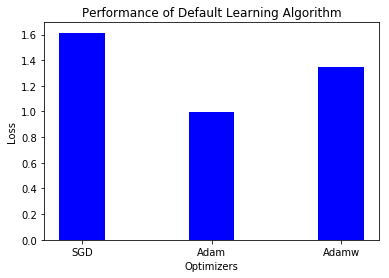

In [25]:
n_groups = 3
optims = (1.61399, 0.99686, 1.34338)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, optims, bar_width,
                color='b',
                error_kw=error_config,
                label='Accuracy')
ax.set_xlabel('Optimizers')
ax.set_ylabel('Loss')
ax.set_title('Performance of Default Learning Algorithm')
ax.set_xticks(index)
ax.set_xticklabels(('SGD','Adam', 'Adamw'))

In [96]:
min_ratings, max_ratings = float(book_ratings.rating.min()), float(book_ratings.rating.max())
min_ratings, max_ratings

(1.0, 5.0)

In [97]:
def get_emb(ni,nf):
    e=nn.Embedding(ni,nf)
    e.weight.data.uniform_(-0.01,0.01)
    return e

class EmbeddingNetwork(nn.Module):
    def __init__(self, nusers, nbooks, nh=10, p1=0.05, p2=0.2):
        super().__init__()
        (self.u, self.m) = [get_emb(*o) for o in [
            (nusers, n_factors), (nbooks, n_factors)]]
        self.lin1 = nn.Linear(n_factors*2, nh)
        self.lin2 = nn.Linear(nh, 1)
        self.drop1 = nn.Dropout(p1)
        self.drop2 = nn.Dropout(p2)
    
    def forward(self,cat_var,cont_var):
        users,books=cat_var[:,0],cat_var[:,1]
        x = self.drop1(torch.cat([self.u(users),self.m(books)], dim=1))
        x = self.drop2(F.relu(self.lin1(x)))
        return F.sigmoid(self.lin2(x)) * (max_ratings-min_ratings+1) + min_ratings-0.5

In [26]:
class EmbeddingNetwork(nn.Module):
    def __init__(self, nusers, nbooks, num_hid=12, drp_rate_lin1=0.05, drp_rate_lin2=0.2):
        super().__init__()
        (self.u, self.m) = [get_emb(*o) for o in [
            (nusers, n_factors), (nbooks, n_factors)]]
        self.lin1 = nn.Linear(n_factors*2, num_hid)
        self.lin2 = nn.Linear(num_hid, 1)
        self.drop1 = nn.Dropout(drp_rate_lin1)
        self.drop2 = nn.Dropout(drp_rate_lin2)
    
    def forward(self,cat_var,cont_var):
        users,books=cat_var[:,0],cat_var[:,1]
        x = self.drop1(torch.cat([self.u(users),self.m(books)], dim=1))
        x = self.drop2(F.relu(self.lin1(x)))
        return F.sigmoid(self.lin2(x)) * (max_ratings-min_ratings+1) + min_ratings-0.5

In [98]:
cf.n_users

53424

In [99]:
u_uniq = book_ratings.user_id.unique()
user2idx = {o:i for i,o in enumerate(u_uniq)}
book_ratings.user_id = book_ratings.user_id.apply(lambda x: user2idx[x])

b_uniq = book_ratings.book_id.unique()
book2idx = {o:i for i,o in enumerate(b_uniq)}
book_ratings.book_id = book_ratings.book_id.apply(lambda x: book2idx[x])

n_users=int(book_ratings.user_id.nunique())
n_books=int(book_ratings.book_id.nunique())

In [100]:
n_users

53424

In [101]:
x = book_ratings.drop(['rating'],axis=1)
y = book_ratings['rating'].astype(np.float32)

In [102]:
data = ColumnarModelData.from_data_frame(path, val_idx, x, y, ['user_id', 'book_id'], 64)

In [103]:
weight_decay=1e-5
model = EmbeddingNetwork(n_users, n_books).cuda()
opt = optim.Adam(model.parameters(), 1e-3, weight_decay=weight_decay)

In [104]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                    
    0      0.737496   0.738007  
    1      0.736017   0.721472                                    
    2      0.711645   0.716133                                    



[array([0.71613])]

In [106]:
np.sqrt(0.71613)

0.8462446454778901

In [107]:
set_lrs(opt, 1e-3)

In [108]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                    
    0      0.726396   0.711903  
    1      0.692976   0.70865                                     
    2      0.701333   0.7092                                      



[array([0.7092])]

In [109]:
preds = learn.predict()

/home/kaju/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


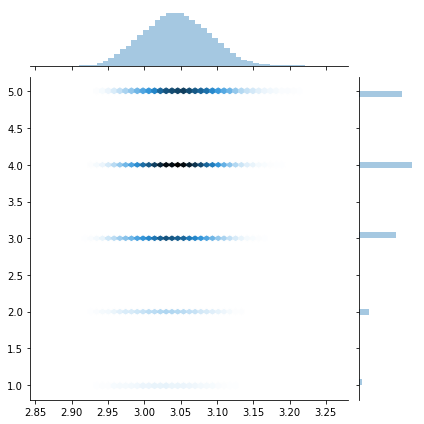

In [110]:
y=learn.data.val_y
sns.jointplot(preds, y, kind='hex', stat_func=None);

In [111]:
y

array([5., 5., 5., ..., 4., 4., 5.], dtype=float32)

In [147]:
book_names = books.set_index('id')['original_title'].to_dict()
g=book_ratings.groupby('book_id')['rating'].count()
topBooks=g.sort_values(ascending=False).index.values[:3000]
topBookIdx = np.array([cf.item2idx[o] for o in topBooks])

In [148]:
m=learn.model; m.cuda()

EmbeddingDotBias(
  (u): Embedding(53424, 50)
  (i): Embedding(10000, 50)
  (ub): Embedding(53424, 1)
  (ib): Embedding(10000, 1)
)

In [149]:
book_bias = to_np(m.ib(V(topBookIdx)))
book_bias

array([[ 0.0109 ],
       [ 0.03929],
       [-0.00607],
       ...,
       [-0.01272],
       [-0.00607],
       [ 0.00434]], dtype=float32)

In [150]:
book_names[99]

'Fifty Shades Darker'

In [151]:
book_ratings = [(b[0], book_names[i-500]) for i,b in zip(topBooks,book_bias)]

In [153]:
sorted(book_ratings, key=lambda o: o[0])[:15]

[(-0.05343335, 'The Sixth Man'),
 (-0.04762109, 'An Autobiography or The Story of My Experiments with Truth'),
 (-0.04674676, 'The Ghost Map'),
 (-0.04308168, 'Foundation and Earth'),
 (-0.0420719, 'Nicolae: The Rise of Antichrist'),
 (-0.040290322, 'The Wednesday Wars'),
 (-0.040211435, 'The Runaway Jury'),
 (-0.03952467, 'Hallowed'),
 (-0.03888596, nan),
 (-0.037871923, 'Il nome della rosa'),
 (-0.037044507, 'Child of God'),
 (-0.03693131, 'The Rum Diary'),
 (-0.036649205, 'Hocus Pocus'),
 (-0.035394236, '孫子兵法 [Sūnzi bīngfǎ]'),
 (-0.035234798, 'Elizabeth Is Missing')]

In [155]:
sorted(book_ratings, key=lambda o: o[0], reverse=True)[:15]

[(0.09634891, 'The Voyage of the Dawn Treader'),
 (0.09473138, 'Shadows of Self'),
 (0.09350728, 'The Life of Elizabeth I'),
 (0.09333396, 'Coma'),
 (0.093154855, 'Monstrous Regiment'),
 (0.092911996, 'Gregor and the Curse of the Warmbloods'),
 (0.092113115, 'Stranger Than Fiction: True Stories'),
 (0.091189966, 'The Cask of Amontillado'),
 (0.091100365, "James Potter and the Hall of Elders' Crossing "),
 (0.09092808, 'The Obsession'),
 (0.09010732, 'Storm Front'),
 (0.089873895, 'Autobiography of a Yogi'),
 (0.08963026, 'The Guy Not Taken: Stories'),
 (0.08936377, 'Johnny Tremain'),
 (0.08908561, nan)]

Visualizing Predictions

In [157]:
book_emb = to_np(m.i(V(topBookIdx)))
book_emb.shape
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
book_pca = pca.fit(book_emb.T).components_
fac0 = book_pca[0]
book_comp = [(f, book_names[i]) for f,i in zip(fac0, topBooks)]

In [159]:
fac1 = book_pca[1]
book_comp = [(f, book_names[i]) for f,i in zip(fac1, topBooks)]

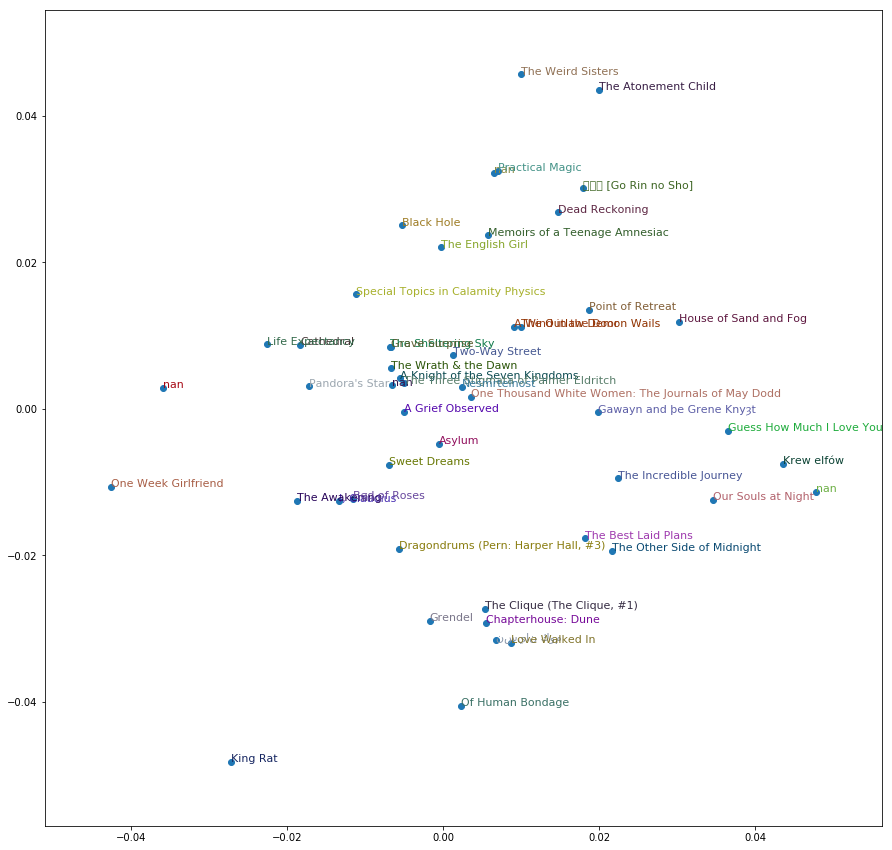

In [160]:
idxs = np.random.choice(len(topBooks), 50, replace=False)
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(topBooks[idxs], X, Y):
    plt.text(x,y,book_names[i], color=np.random.rand(3)*0.7, fontsize=11)
plt.show()